In [96]:
import pandas as pd
import time
import praw
import matplotlib.pyplot as plt

In [2]:
CLIENT_ID = "Co_p839bA_wjqA"
CLIENT_SECRET = "XItgYS7EFva2lvU2GOr4gVKvULc"
USER_AGENT = f"python:{CLIENT_ID}:0.1 (by /u/Voidskiz)"

In [3]:
api = praw.Reddit(
    client_id = CLIENT_ID,
    client_secret = CLIENT_SECRET,
    user_agent = USER_AGENT
)

In [4]:
posts = []
submissions = api.subreddit("europe").new(limit = 500)
for submission in submissions:
    item = {
        "title" : submission.title,
        "score" : submission.score,
        "comments" : submission.num_comments,
        "author" : submission.author,
        "time" : time.ctime(submission.created_utc),
        "id" : submission.id
    }
    posts.append(item)

    # submissions in a new list containing 
    #author's name, time created, 'score', number of comments in a submission and the title.


In [5]:
df = pd.DataFrame(posts)

In [6]:
df.head()

,author,comments,id,score,time,title
0,vlad_albulescu,0,9qec3g,1,Mon Oct 22 16:30:31 2018,Student granted UK visa after uproar
1,dobramine,0,9qebzb,1,Mon Oct 22 16:30:11 2018,Bolton in Moscow amid missile deal tension
2,mryuri-88,1,9qe7r5,0,Mon Oct 22 16:16:50 2018,rain ♡♡♡
3,ForPOTUS,0,9qe5l5,1,Mon Oct 22 16:09:45 2018,With All the Talk of a Petroyuan it Seems Like...
4,OrneryThroat,0,9qe4hi,4,Mon Oct 22 16:06:11 2018,Italian populist government braces for EU budg...


In [7]:
valcounts = df['author'].value_counts()

In [8]:
valcounts.head(10)

sektabox          21
dobramine         10
vlad_albulescu     9
Atellani           8
SlyScorpion        8
Cxbfkfn            7
JackRogers3        6
Saint_eX           6
boppinmule         6
seamath2           5
Name: author, dtype: int64

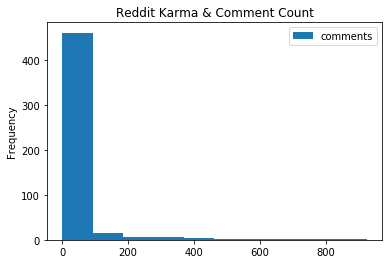

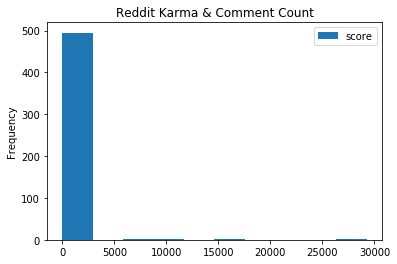

In [99]:
#Plot a histogram with ten bins for both the comment count and score of all the submissions.
df.plot(kind = "hist", y = ["comments"], bins = 10, title = "Reddit Karma & Comment Count")
df.plot(kind = "hist", y = ["score"], bins = 10, title = "Reddit Karma & Comment Count")

In [122]:
# Make a line plot showing the number of posts per hour/day/month, depending on the frequency of posting in your chosen subreddit. You'll need to convert the timestamps / created date to a new Pandas series and resample that to hour/day/month.
def timeformat_day(time):
    return time[0:3]
def timeformat_hour(time):
    return time[10:13]
def timeformat_month(time):
    return time[4:7]
def timeformat_daynr(time):
    return time[8:10]

df["day"] = df["time"].apply(timeformat_day)
df["month"] = df["time"].apply(timeformat_month)
df["daynr"] = df["time"].apply(timeformat_daynr)
df["hour"] = df["time"].apply(timeformat_hour)

In [123]:
df.head(5)

,author,comments,id,score,time,title,day,month,daynr,hour,numerichour
0,vlad_albulescu,0,9qec3g,1,Mon Oct 22 16:30:31 2018,Student granted UK visa after uproar,Mon,Oct,22,16,16
1,dobramine,0,9qebzb,1,Mon Oct 22 16:30:11 2018,Bolton in Moscow amid missile deal tension,Mon,Oct,22,16,16
2,mryuri-88,1,9qe7r5,0,Mon Oct 22 16:16:50 2018,rain ♡♡♡,Mon,Oct,22,16,16
3,ForPOTUS,0,9qe5l5,1,Mon Oct 22 16:09:45 2018,With All the Talk of a Petroyuan it Seems Like...,Mon,Oct,22,16,16
4,OrneryThroat,0,9qe4hi,4,Mon Oct 22 16:06:11 2018,Italian populist government braces for EU budg...,Mon,Oct,22,16,16


In [109]:
daily = df['daynr'].value_counts()

In [110]:
daily

21    151
19    136
20    115
22     80
18     18
Name: daynr, dtype: int64

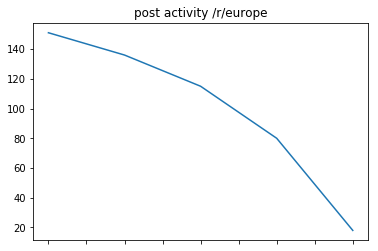

In [124]:
daily.plot.line(y="numericday", title="post activity /r/europe")

In [59]:
highestcomment = df.sort_values(by="comments",ascending=False)
mostcomments = highestcomment["id"].head(1)
postid = mostcomments.to_string(index=False)
post = api.submission(id=f'{postid}')

commentz = []

for comment in post.comments:
    if isinstance(comment, praw.models.MoreComments):
        continue
    item = {
        "author" : comment.author.name,
        "score" : comment.score,
        "body": comment.body
    }
    commentz.append(item)

commentdf = pd.DataFrame(commentz)
commentdf.head(5)

,author,body,score
0,AmericanSamoa6666,Largest protest in the U.K. since the Iraq war,333
1,H0agh,Latest estimate is 670.000 which is pretty imp...,556
2,dinkydarko,Was down there earlier. By far the largest mar...,202
3,Throwawayacountn3,Are ok UK?,131
4,PePe_The_Frog,but if they reverse the vote then ppl will mar...,244


In [69]:
topcommenters = pd.DataFrame(commentdf.groupby("author")["score"].sum().sort_values(ascending = False))
topcommenters.head(5)

,score
author,
H0agh,556
AmericanSamoa6666,333
PePe_The_Frog,244
dinkydarko,202
U-GameZ,167


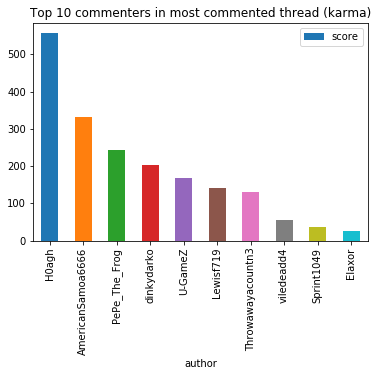

In [87]:
top10 = pd.DataFrame(topcommenters.head(10))
top10.plot(kind="bar", y="score", title="Top 10 commenters in most commented thread (karma)")
# For that same DataFrame, plot the top 10 authors as a horizontal bar chart with the total score they got.